In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [47]:
df = pd.read_csv('/Users/rishabhsharma/Documents/GitHub/Sentencing_prediction/data/df_complete.csv')

In [48]:
df.shape

(185405, 31)

In [49]:
df['sentence_type'].value_counts()

Probation             110355
Confinement            46705
No Further Penalty     17693
Merged                  8196
IPP                     2456
Name: sentence_type, dtype: int64

In [50]:
df.drop(['docket_id', 'defendant_id', 'sequence_number', 'Unnamed: 0'], axis = 1, inplace = True)

In [51]:
df.columns

Index(['gender_x', 'race_x', 'date_of_birth_x', 'arrest_date_x',
       'filing_date_x', 'initiation_date_x', 'status_name_x',
       'court_office__court__display_name_x',
       'current_processing_status__status_change_datetime',
       'judicial_districts', 'court_office_types', 'court_types',
       'representation_type', 'description', 'statute_description',
       'disposing_authority__title', 'sentence_type', 'gender_y', 'race_y',
       'date_of_birth_y', 'arrest_date_y', 'disposition_date', 'filing_date_y',
       'initiation_date_y', 'status_name_y',
       'court_office__court__display_name_y', 'disposing_authority'],
      dtype='object')

In [52]:
df.drop(['gender_y', 'race_y',
       'date_of_birth_y', 'arrest_date_y', 'disposition_date', 'filing_date_y',
       'initiation_date_y', 'status_name_y',
       'court_office__court__display_name_y', 'current_processing_status__status_change_datetime'], axis = 1, inplace = True)

In [53]:
df.columns

Index(['gender_x', 'race_x', 'date_of_birth_x', 'arrest_date_x',
       'filing_date_x', 'initiation_date_x', 'status_name_x',
       'court_office__court__display_name_x', 'judicial_districts',
       'court_office_types', 'court_types', 'representation_type',
       'description', 'statute_description', 'disposing_authority__title',
       'sentence_type', 'disposing_authority'],
      dtype='object')

In [54]:
df['judicial_districts'].value_counts()

Philadelphia                               182521
Delaware, Philadelphia                        946
Bucks, Philadelphia                           624
Montgomery, Philadelphia                      541
Chester, Philadelphia                         195
                                            ...  
Lancaster, York, Philadelphia                   1
Berks, Montgomery, Lehigh, Philadelphia         1
Philadelphia, Tioga                             1
Carbon, Lehigh, Philadelphia                    1
Clinton, Philadelphia                           1
Name: judicial_districts, Length: 85, dtype: int64

In [55]:
## 'ifjudicial_districts' is not philadelphia, then drop the row
df = df[df['judicial_districts'] == 'Philadelphia']

In [56]:
df.drop(['court_office_types'], axis = 1, inplace = True)

In [57]:
df.drop(['representation_type'], axis = 1, inplace = True)

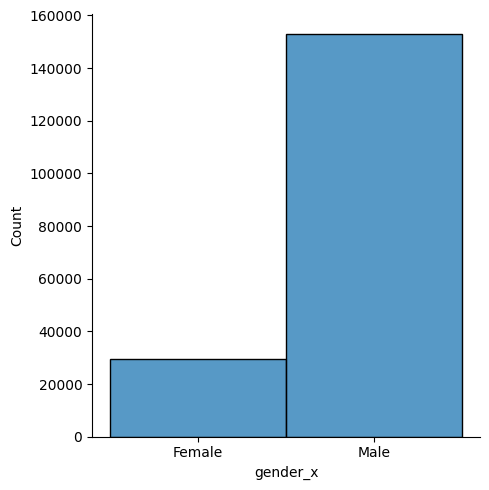

In [58]:
## plotting the genders in the dataset
sns.displot(data=df, x="gender_x")


In [59]:
df['race_x'].value_counts()

Black                             109632
White                              67514
Asian/Pacific Islander              2654
Unknown/Unreported                  2519
Native American/Alaskan Native       111
Bi-Racial                             46
Asian                                 45
Name: race_x, dtype: int64

In [60]:
## lable encoding the categorical variables

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [61]:
df['race_x']= le.fit_transform(df['race_x'])
df['gender_x'] = le.fit_transform(df['gender_x'])
df['status_name_x'] = le.fit_transform(df['status_name_x'])
df['court_office__court__display_name_x'] = le.fit_transform(df['court_office__court__display_name_x'])
df['court_types'] = le.fit_transform(df['court_types'])

In [62]:
df['sentence_type'] = le.fit_transform(df['sentence_type'])
df.drop(['judicial_districts'], axis = 1, inplace = True)

In [63]:
df.head()

,gender_x,race_x,date_of_birth_x,arrest_date_x,filing_date_x,initiation_date_x,status_name_x,court_office__court__display_name_x,court_types,description,statute_description,disposing_authority__title,sentence_type,disposing_authority
1,0,3,1970-01-01,2010-03-01,2010-03-01,2010-03-01,3,0,3,DUI: Gen Imp/Inc of Driving Safely - 1st Off,DUI: Gen Imp/Inc of Driving Safely - 1st Off,Judge,2,Thomas F. Gehret
3,1,3,1953-01-01,2010-05-01,2010-10-01,2010-10-01,3,1,4,"Manufacture, Delivery, or Possession With Inte...","Manufacture, Delivery, or Possession With Inte...",Judge,0,Daniel J. Anders
4,1,5,1950-01-01,2010-05-01,2010-06-01,2010-06-01,3,1,4,Retail Theft-Take Mdse,Retail Theft-Take Mdse,Judge,4,Rayford A. Means
7,1,1,1972-01-01,2011-01-01,2011-01-01,2011-01-01,3,0,3,DUI: Controlled Substance or Metabolite 1st Of...,DUI: Controlled Substance or Metabolite 1st Of...,Judge,2,Joseph J. O'Neill
8,1,6,1968-01-01,2011-04-01,2011-04-01,2011-04-01,3,1,4,"Manufacture, Delivery, or Possession With Inte...","Manufacture, Delivery, or Possession With Inte...",Judge,0,Adam nan Beloff


In [64]:
df['statute_description'][8]

'Manufacture, Delivery, or Possession With Intent to Manufacture or Deliver'

In [65]:
df['description'][8]

'Manufacture, Delivery, or Possession With Intent to Manufacture or Deliver'

In [66]:
df.drop(['statute_description'], axis = 1, inplace = True)

In [67]:
df.head()

,gender_x,race_x,date_of_birth_x,arrest_date_x,filing_date_x,initiation_date_x,status_name_x,court_office__court__display_name_x,court_types,description,disposing_authority__title,sentence_type,disposing_authority
1,0,3,1970-01-01,2010-03-01,2010-03-01,2010-03-01,3,0,3,DUI: Gen Imp/Inc of Driving Safely - 1st Off,Judge,2,Thomas F. Gehret
3,1,3,1953-01-01,2010-05-01,2010-10-01,2010-10-01,3,1,4,"Manufacture, Delivery, or Possession With Inte...",Judge,0,Daniel J. Anders
4,1,5,1950-01-01,2010-05-01,2010-06-01,2010-06-01,3,1,4,Retail Theft-Take Mdse,Judge,4,Rayford A. Means
7,1,1,1972-01-01,2011-01-01,2011-01-01,2011-01-01,3,0,3,DUI: Controlled Substance or Metabolite 1st Of...,Judge,2,Joseph J. O'Neill
8,1,6,1968-01-01,2011-04-01,2011-04-01,2011-04-01,3,1,4,"Manufacture, Delivery, or Possession With Inte...",Judge,0,Adam nan Beloff


In [68]:
df['age_at_arrest'] = df['arrest_date_x'].str.split('-').str[0].astype(int) - df['date_of_birth_x'].str.split('-').str[0].astype(int)
df['initiation_date'] = df['initiation_date_x'].str.split('-').str[0].astype(int) - df['filing_date_x'].str.split('-').str[0].astype(int)
df.drop(['date_of_birth_x', 'arrest_date_x', 'initiation_date_x', 'filing_date_x'], axis = 1, inplace = True)

In [69]:
df.head()

,gender_x,race_x,status_name_x,court_office__court__display_name_x,court_types,description,disposing_authority__title,sentence_type,disposing_authority,age_at_arrest,initiation_date
1,0,3,3,0,3,DUI: Gen Imp/Inc of Driving Safely - 1st Off,Judge,2,Thomas F. Gehret,40,0
3,1,3,3,1,4,"Manufacture, Delivery, or Possession With Inte...",Judge,0,Daniel J. Anders,57,0
4,1,5,3,1,4,Retail Theft-Take Mdse,Judge,4,Rayford A. Means,60,0
7,1,1,3,0,3,DUI: Controlled Substance or Metabolite 1st Of...,Judge,2,Joseph J. O'Neill,39,0
8,1,6,3,1,4,"Manufacture, Delivery, or Possession With Inte...",Judge,0,Adam nan Beloff,43,0


In [70]:
df['disposing_authority__title'] = le.fit_transform(df['disposing_authority__title'])

In [71]:
df['disposing_authority'] = le.fit_transform(df['disposing_authority'])

In [72]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder()

##one hot encoding the description column

##df['description'] = ohe.fit_transform(df['description'].values.reshape(-1,1)).toarray()


In [73]:
df.head()

,gender_x,race_x,status_name_x,court_office__court__display_name_x,court_types,description,disposing_authority__title,sentence_type,disposing_authority,age_at_arrest,initiation_date
1,0,3,3,0,3,DUI: Gen Imp/Inc of Driving Safely - 1st Off,3,2,170,40,0
3,1,3,3,1,4,"Manufacture, Delivery, or Possession With Inte...",3,0,39,57,0
4,1,5,3,1,4,Retail Theft-Take Mdse,3,4,136,60,0
7,1,1,3,0,3,DUI: Controlled Substance or Metabolite 1st Of...,3,2,95,39,0
8,1,6,3,1,4,"Manufacture, Delivery, or Possession With Inte...",3,0,3,43,0


In [74]:

from sklearn.model_selection import train_test_split

Y = df['sentence_type']
X = df.drop(['sentence_type'], axis = 1)

In [75]:
X_cv = X['description']
X.drop(['description'], axis = 1, inplace = True)

In [76]:
X_cv.to_numpy()

array(['DUI: Gen Imp/Inc of Driving Safely - 1st Off',
       'Manufacture, Delivery, or Possession With Intent to Manufacture or Deliver',
       'Retail Theft-Take Mdse', ...,
       'Robbery-Inflict Serious Bodily Injury',
       'Theft By Unlaw Taking-Movable Prop',
       'Theft By Unlaw Taking-Movable Prop'], dtype=object)

In [77]:
type(X_cv.values)

numpy.ndarray

In [78]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()

X_cv = cv.fit_transform(X_cv.values)

In [79]:
X_cv.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [80]:
cv.get_feature_names_out()

array(['02', '025', '08', ..., 'wrk', 'years', 'yrs'], dtype=object)

In [81]:
cv.vocabulary_

{'dui': 293,
 'gen': 394,
 'imp': 438,
 'inc': 448,
 'of': 640,
 'driving': 288,
 'safely': 837,
 '1st': 10,
 'off': 641,
 'manufacture': 568,
 'delivery': 242,
 'or': 663,
 'possession': 720,
 'with': 1025,
 'intent': 486,
 'to': 942,
 'deliver': 241,
 'retail': 822,
 'theft': 929,
 'take': 911,
 'mdse': 579,
 'controlled': 196,
 'substance': 902,
 'metabolite': 583,
 'offense': 645,
 'false': 348,
 'identification': 425,
 'law': 529,
 'enforcement': 311,
 'officer': 650,
 'crim': 207,
 'misch': 590,
 'dmg': 277,
 'prop': 743,
 'reckless': 782,
 'neglig': 611,
 'highest': 412,
 'rte': 835,
 'alc': 61,
 'bac': 111,
 '16': 8,
 '2nd': 12,
 'robbery': 833,
 'threat': 931,
 'immed': 436,
 'ser': 853,
 'injury': 474,
 'int': 485,
 'poss': 717,
 'contr': 192,
 'subst': 900,
 'by': 140,
 'per': 690,
 'not': 619,
 'reg': 793,
 'unlaw': 973,
 'taking': 912,
 'movable': 602,
 'tamper': 913,
 'property': 747,
 'purc': 765,
 'rec': 778,
 'cont': 187,
 'substby': 905,
 'unauth': 963,
 'resist': 815

In [82]:
X.head()

,gender_x,race_x,status_name_x,court_office__court__display_name_x,court_types,disposing_authority__title,disposing_authority,age_at_arrest,initiation_date
1,0,3,3,0,3,3,170,40,0
3,1,3,3,1,4,3,39,57,0
4,1,5,3,1,4,3,136,60,0
7,1,1,3,0,3,3,95,39,0
8,1,6,3,1,4,3,3,43,0


In [83]:
X = X.to_numpy()

In [84]:
X.shape

(182521, 9)

In [85]:
X_cv.shape

(182521, 1035)

In [86]:
X = np.concatenate((X, X_cv.toarray()), axis = 1)

In [87]:
X.shape

(182521, 1044)

In [88]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.33, random_state = 42)

In [89]:
print("shape of X_train: ", X_train.shape)
print("shape of X_test: ", X_test.shape)
print("shape of Y_train: ", Y_train.shape)
print("shape of Y_test: ", Y_test.shape)

shape of X_train:  (122289, 1044)
shape of X_test:  (60232, 1044)
shape of Y_train:  (122289,)
shape of Y_test:  (60232,)


In [90]:
np.save('../data/X_train.npy', X_train)
np.save('../data/X_test.npy', X_test)
np.save('../data/Y_train.npy', Y_train)
np.save('../data/Y_test.npy', Y_test)